In [1]:
import matplotlib.pyplot as plt
import numpy as np

from src import acf_utils, sim

# set notebook defaults
np.set_printoptions(precision=3, suppress=True)
random_seed = 1
n_regions, n_timepoints = 3, 1200
sampling_rate = 1 / 0.75

# cross-correlation used for all simulations
xcorr = np.array([[1.0, 0.9, 0.3], [0.9, 1.0, 0], [0.3, 0, 1.0]])


def plot_grid(X, acf_true, acf_sim, cutoff=100):
    """plot timeseries + auto-correlation function"""

    fig, axs = plt.subplots(2, 1, figsize=(15, 5), sharex=True)
    fig.tight_layout(pad=3)

    # timeseries
    axs[0].plot(X[:, :cutoff].T, alpha=0.5, label=[f"region-{i}" for i in range(n_regions)])
    axs[0].legend()
    axs[0].set_xlabel("timepoints")
    axs[0].set_ylabel("BOLD signal (au)")

    # acf
    acf_true = acf_true[:, :cutoff] if acf_true.ndim == 2 else acf_true[:cutoff]
    axs[1].plot(acf_true.T, lw=1, c="k", ls="--", label="ACF [true]")
    axs[1].plot(acf_sim[:, :cutoff].T, alpha=0.5, label="ACF [simulated]")
    h, l = axs[1].get_legend_handles_labels()
    axs[1].legend(h[-4:], l[-4:])
    axs[1].set_xlabel("lag (timepoints)")
    axs[1].set_ylabel("autocorrelation")


**no auto-correlation**

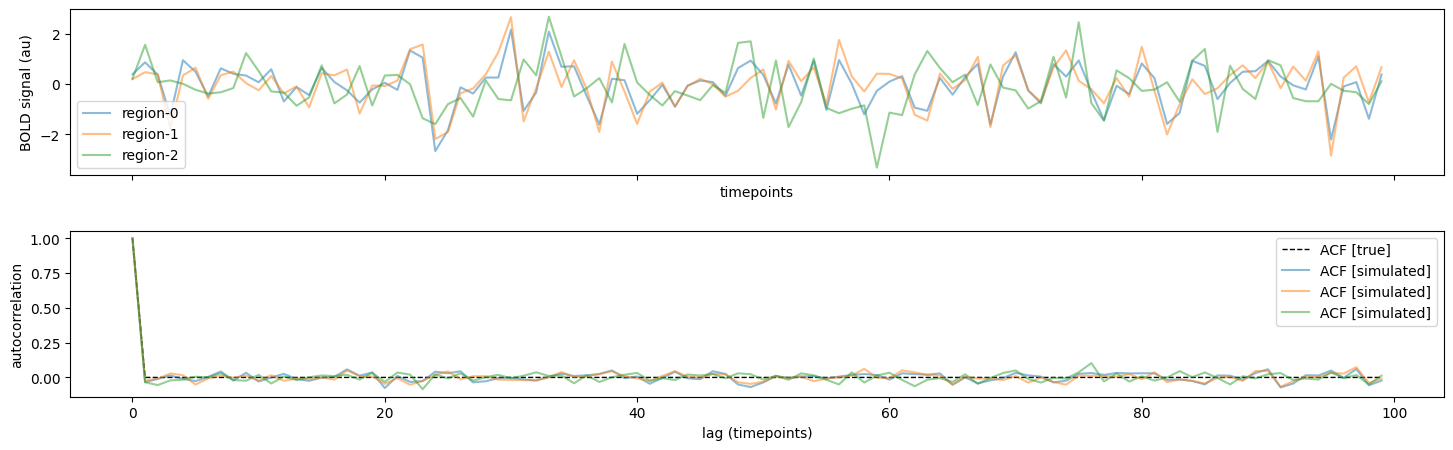

In [2]:
acorr = np.eye(n_timepoints)
acf = acorr[0, :]

X = sim.sim_fmri(xcorr, acorr, n_regions, n_timepoints, random_seed)
X_acf = acf_utils.acf_fft(X, n_timepoints)

# check that cross-correlations are correct
assert np.allclose(xcorr, sim.calc_xcorr(X, n_timepoints, corrected=False), atol=0.1)

plot_grid(X, acf, X_acf)


**exponentially decaying auto-correlation**


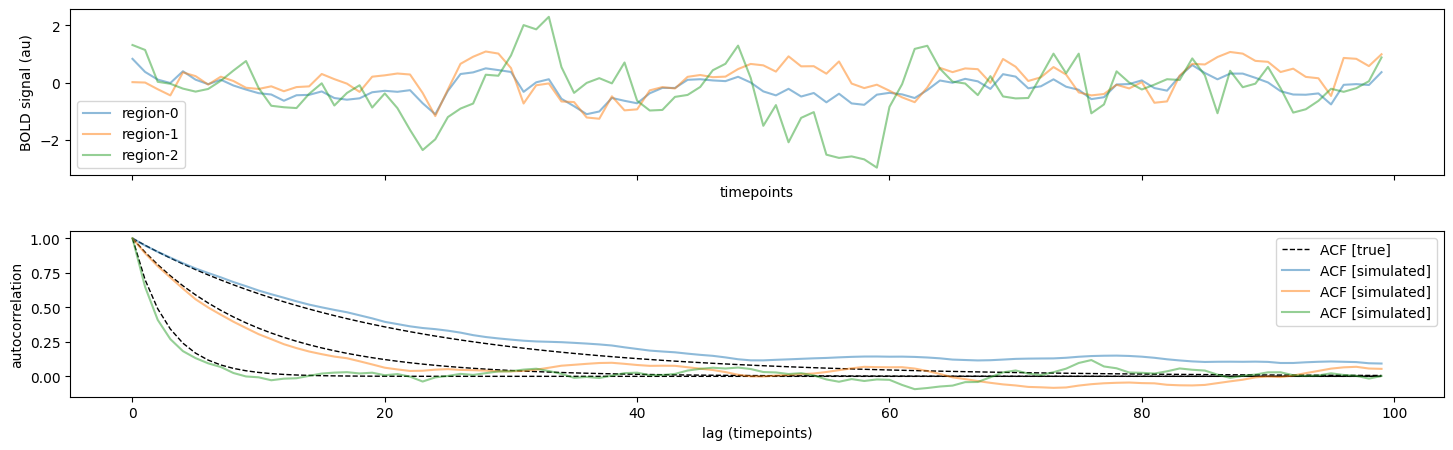

In [3]:
powers = [0.95, 0.9, 0.7]
acf = np.array([np.power(power, np.arange(n_timepoints)) for power in powers])
acorr = acf_utils.acf_to_toeplitz(acf, n_timepoints)

X = sim.sim_fmri(xcorr, acorr, n_regions, n_timepoints, random_seed)
X_acf = acf_utils.acf_fft(X, n_timepoints)

# check that cross-correlations are correct
assert np.allclose(xcorr, sim.calc_xcorr(X, n_timepoints, corrected=True), atol=0.1)

plot_grid(X, acf, X_acf)


**realistic fMRI auto-correlation**

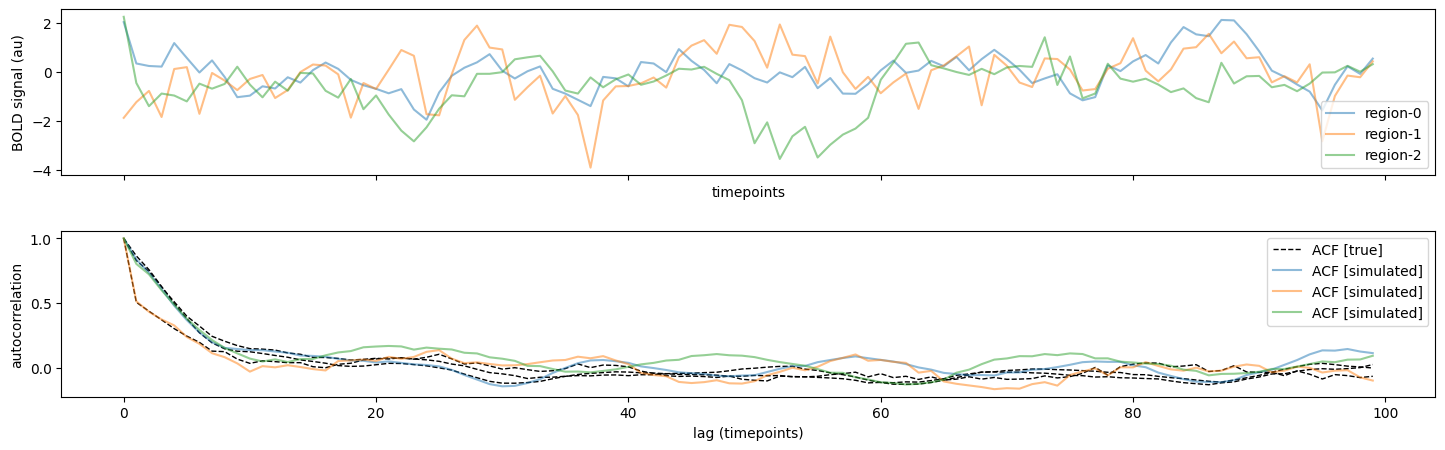

In [4]:
acf = np.load("../tests/data/fmri-acf.npy")
acorr = acf_utils.acf_to_toeplitz(acf, n_timepoints)

X = sim.sim_fmri(xcorr, acorr, n_regions, n_timepoints, random_seed)
X_acf = acf_utils.acf_fft(X, n_timepoints)

# check that cross-correlations are correct
assert np.allclose(xcorr, sim.calc_xcorr(X, n_timepoints, corrected=True), atol=0.1)

plot_grid(X, acf, X_acf)
